# Linear Regression — Session 1 Notebook

This notebook completes **Session 1** requirements:
- Load housing data (CSV)
- Choose **one feature** (univariate) and one target
- Train/Test split
- **Normalize** feature
- Train **Linear Regression with scikit-learn**
- Train **Linear Regression from scratch (Gradient Descent)**
- Evaluate with **RMSE, MAE, R²**
- Plot regression line
- Append results to `experiments/results.csv` (experiment tracking)

> Note: Session 2 will move this logic into modular scripts + YAML config. This notebook is a clean Session 1 implementation.


In [1]:
# ✅ 0. Setup
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PROJECT_ROOT = Path("..").resolve()
RAW_DIR = PROJECT_ROOT / "data" / "raw"
EXP_DIR = PROJECT_ROOT / "experiments"
PLOTS_DIR = EXP_DIR / "plots"

EXP_DIR.mkdir(parents=True, exist_ok=True)
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("RAW_DIR:", RAW_DIR)
print("EXP_DIR:", EXP_DIR)
print("PLOTS_DIR:", PLOTS_DIR)


PROJECT_ROOT: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop
RAW_DIR: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/data/raw
EXP_DIR: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/experiments
PLOTS_DIR: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/experiments/plots


## 1) Load CSV data
We load the California housing dataset saved during EDA (`data/raw/california.csv`).

In [2]:
# Load CSV
csv_path = RAW_DIR / "california.csv"
df = pd.read_csv(csv_path)

print("Loaded:", csv_path)
df.head()


Loaded: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/data/raw/california.csv


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2) Choose ONE feature and target
Univariate regression uses a **single predictor feature**.

Recommended:
- Feature: `MedInc` (Median Income)
- Target: `MedHouseVal` (Median House Value)

You can change these later in Session 2 via YAML config.

In [3]:
feature_col = "MedInc"
target_col = "MedHouseVal"

X = df[[feature_col]].copy()
y = df[target_col].copy()

X.head(), y.head()


(   MedInc
 0  8.3252
 1  8.3014
 2  7.2574
 3  5.6431
 4  3.8462,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: MedHouseVal, dtype: float64)

## 3) Train-test split

In [4]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_SEED = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED
)

X_train.shape, X_test.shape


((16512, 1), (4128, 1))

## 4) Normalize feature (required)
We standardize the feature using `StandardScaler`.

- We **fit** on train data
- We **transform** both train and test using the same scaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Flatten for scratch model
x_train_np = X_train_scaled.flatten()
x_test_np = X_test_scaled.flatten()

print("Scaled shapes:", X_train_scaled.shape, X_test_scaled.shape)


Scaled shapes: (16512, 1) (4128, 1)


## 5) Model 1 — scikit-learn Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(X_train_scaled, y_train)

sk_pred = sk_model.predict(X_test_scaled)

sk_model.coef_, sk_model.intercept_


(array([0.79851956]), np.float64(2.071946937378876))

## 6) Evaluation (RMSE, MAE, R²)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def compute_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

sk_rmse, sk_mae, sk_r2 = compute_metrics(y_test, sk_pred)
sk_rmse, sk_mae, sk_r2


(np.float64(0.8420901241414454), 0.629908653009376, 0.45885918903846656)

## 7) Plot regression line (scikit-learn)
We plot `X_test_scaled` vs predictions. For a clean line, sort X values first.

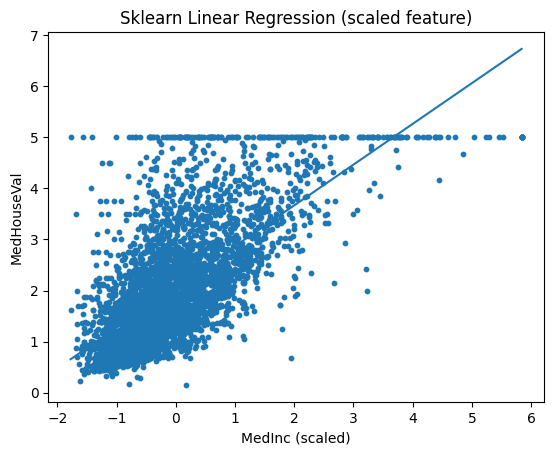

In [9]:
# Sort for a clean line plot
order = np.argsort(x_test_np)
x_sorted = x_test_np[order]
y_test_sorted = y_test.values[order]
sk_pred_sorted = sk_pred[order]

plt.figure()
plt.scatter(x_test_np, y_test, s=10)
plt.plot(x_sorted, sk_pred_sorted)
plt.xlabel(f"{feature_col} (scaled)")
plt.ylabel(target_col)
plt.title("Sklearn Linear Regression (scaled feature)")
plt.show()


In [ ]:
# Save plot
sk_plot_path = PLOTS_DIR / "sklearn_lr_scaled.png"
plt.figure()
plt.scatter(x_test_np, y_test, s=10)
plt.plot(x_sorted, sk_pred_sorted)
plt.xlabel(f"{feature_col} (scaled)")
plt.ylabel(target_col)
plt.title("Sklearn Linear Regression (scaled feature)")
plt.savefig(sk_plot_path, bbox_inches="tight")
plt.close()

print("Saved plot:", sk_plot_path)


# 8) Model 2 — From Scratch (Gradient Descent)
We implement:
- Hypothesis: `y = w*x + b`
- Cost: MSE
- Gradient Descent updates for `w` and `b`

We train using the **scaled** feature for stability.

In [10]:
# Hyperparameters for scratch model
lr = 0.01
iterations = 2000

w = 0.0
b = 0.0
n = len(x_train_np)

loss_history = []

for i in range(iterations):
    y_hat = w * x_train_np + b
    error = y_hat - y_train.values

    # Gradients
    dw = (2 / n) * np.sum(error * x_train_np)
    db = (2 / n) * np.sum(error)

    # Update
    w -= lr * dw
    b -= lr * db

    # Track loss occasionally
    if i % 100 == 0:
        mse = np.mean(error ** 2)
        loss_history.append(mse)

w, b, loss_history[:5]


(np.float64(0.7985195644260324),
 np.float64(2.0719469373788653),
 [np.float64(5.629742323103131),
  np.float64(0.7858638044484011),
  np.float64(0.7006699276977),
  np.float64(0.6991715423422744),
  np.float64(0.6991451888206484)])

## 9) Predict + evaluate scratch model

In [11]:
scratch_pred = w * x_test_np + b

scratch_rmse, scratch_mae, scratch_r2 = compute_metrics(y_test, scratch_pred)
scratch_rmse, scratch_mae, scratch_r2


(np.float64(0.8420901241414454), 0.6299086530093739, 0.45885918903846656)

## 10) Plot scratch regression line

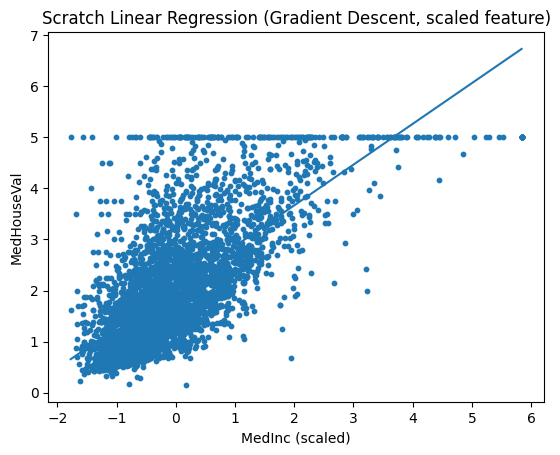

In [12]:
scratch_pred_sorted = scratch_pred[order]

plt.figure()
plt.scatter(x_test_np, y_test, s=10)
plt.plot(x_sorted, scratch_pred_sorted)
plt.xlabel(f"{feature_col} (scaled)")
plt.ylabel(target_col)
plt.title("Scratch Linear Regression (Gradient Descent, scaled feature)")
plt.show()


In [ ]:
# Save plot
scratch_plot_path = PLOTS_DIR / "scratch_lr_scaled.png"
plt.figure()
plt.scatter(x_test_np, y_test, s=10)
plt.plot(x_sorted, scratch_pred_sorted)
plt.xlabel(f"{feature_col} (scaled)")
plt.ylabel(target_col)
plt.title("Scratch Linear Regression (Gradient Descent, scaled feature)")
plt.savefig(scratch_plot_path, bbox_inches="tight")
plt.close()

print("Saved plot:", scratch_plot_path)


## 11) Plot training loss curve (scratch)
This helps show that gradient descent is converging.

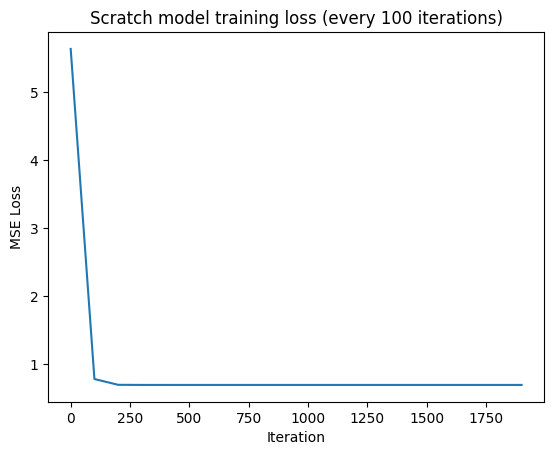

In [13]:
plt.figure()
plt.plot(np.arange(0, len(loss_history)) * 100, loss_history)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Scratch model training loss (every 100 iterations)")
plt.show()


In [ ]:
# Save loss plot
loss_plot_path = PLOTS_DIR / "scratch_loss.png"
plt.figure()
plt.plot(np.arange(0, len(loss_history)) * 100, loss_history)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Scratch model training loss (every 100 iterations)")
plt.savefig(loss_plot_path, bbox_inches="tight")
plt.close()

print("Saved plot:", loss_plot_path)


## 12) Comparison Summary

In [14]:
summary = pd.DataFrame({
    "Model": ["Sklearn", "From Scratch"],
    "RMSE": [sk_rmse, scratch_rmse],
    "MAE": [sk_mae, scratch_mae],
    "R2": [sk_r2, scratch_r2]
})
summary


,Model,RMSE,MAE,R2
0,Sklearn,0.84209,0.629909,0.458859
1,From Scratch,0.84209,0.629909,0.458859


## 13) Experiment tracking — append to `experiments/results.csv`
We **append** results (not overwrite) so we can run multiple experiments and keep history.

In [16]:
import csv

results_csv = EXP_DIR / "results.csv"

row_sklearn = {
    "model": "sklearn",
    "feature": feature_col,
    "target": target_col,
    "normalize": True,
    "test_size": TEST_SIZE,
    "seed": RANDOM_SEED,
    "rmse": sk_rmse,
    "mae": sk_mae,
    "r2": sk_r2,
    "notes": "Session1 notebook (scaled feature)"
}

row_scratch = {
    "model": "scratch",
    "feature": feature_col,
    "target": target_col,
    "normalize": True,
    "test_size": TEST_SIZE,
    "seed": RANDOM_SEED,
    "rmse": scratch_rmse,
    "mae": scratch_mae,
    "r2": scratch_r2,
    "notes": f"GD lr={lr}, iters={iterations} (scaled feature)"
}

fieldnames = list(row_sklearn.keys())

file_exists = results_csv.exists()

with open(results_csv, "a", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    if not file_exists:
        writer.writeheader()
    writer.writerow(row_sklearn)
    writer.writerow(row_scratch)

print("Appended results to:", results_csv)
pd.read_csv(results_csv).tail(10)


Appended results to: /Users/thanmayaanil/Desktop/Python/LinearRegressionArchitecture_Workshop/experiments/results.csv


,model,feature,target,normalize,test_size,seed,rmse,mae,r2,notes
0,sklearn,MedInc,MedHouseVal,True,0.2,42,0.84209,0.629909,0.458859,Session1 notebook (scaled feature)
1,scratch,MedInc,MedHouseVal,True,0.2,42,0.84209,0.629909,0.458859,"GD lr=0.01, iters=2000 (scaled feature)"


## 14) Done 
now have:
- A clean Session 1 notebook
- Both sklearn and scratch models
- Normalization
- Metrics + plots
- Experiment tracking (append)

Next: In Session 2, we will refactor these steps into modules and a config-driven `run_experiment.py` pipeline.
